In [80]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('MSFT_5Y.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-21,55.799999,56.230000,55.419998,55.779999,51.148682,38909100
1,2016-04-22,51.910000,52.430000,50.770000,51.779999,47.480804,126834100
2,2016-04-25,51.779999,52.130001,51.630001,52.110001,47.783394,33226900
3,2016-04-26,52.259998,52.349998,51.090000,51.439999,47.169029,33532600
4,2016-04-27,51.480000,51.500000,50.549999,50.939999,46.710537,43369300
5,2016-04-28,50.619999,50.770000,49.560001,49.900002,45.756889,43134800


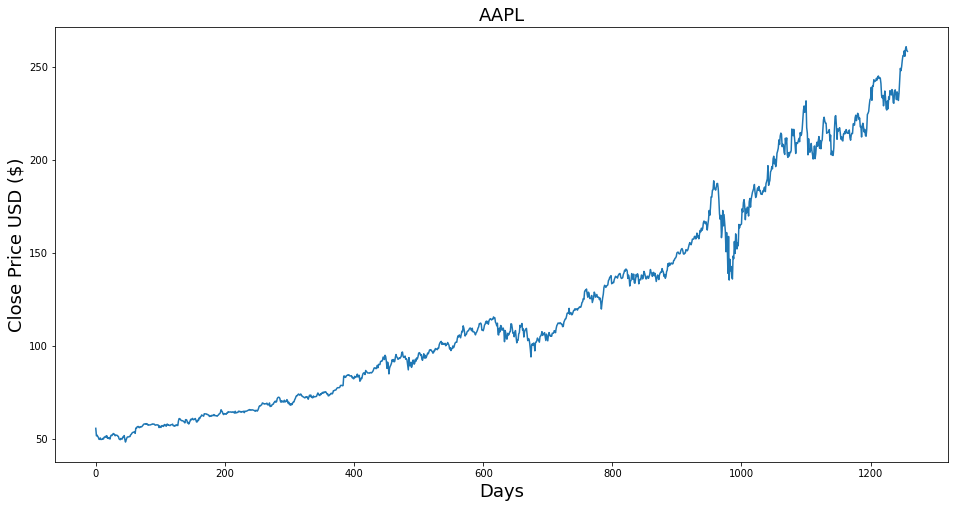

In [82]:
plt.figure(figsize=(16,8))
plt.title('AAPL', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [83]:
# df = df[['Close']]
df = df.drop(['Date'], 1)
df.tail(65)

,Open,High,Low,Close,Adj Close,Volume
1193,213.520004,214.509995,212.029999,212.649994,212.161346,31746500
1194,213.750000,216.979996,212.630005,216.440002,215.942642,30480900
1195,217.699997,225.789993,217.289993,224.339996,223.824493,37777300
1196,224.699997,226.300003,222.419998,224.970001,224.453049,30749600
1197,227.080002,230.070007,225.800003,225.949997,225.430786,30172700
...,...,...,...,...,...,...
1253,257.480011,258.829987,255.160004,255.589996,255.589996,23070900
1254,257.929993,259.929993,257.730011,259.500000,259.500000,25627500
1255,259.470001,261.000000,257.600006,260.739990,260.739990,24856900
1256,260.190002,261.480011,257.820007,258.739990,258.739990,23209300


In [157]:
predict_days = 90
df['Prediction'] = df[['Close']].shift(-predict_days)
df.tail(370)

,Open,High,Low,Close,Adj Close,Volume,Prediction
888,143.520004,145.000000,142.789993,144.610001,142.281174,18496600,153.630005
889,144.899994,144.929993,142.990005,143.369995,141.061111,24605100,139.059998
890,144.259995,144.419998,142.970001,143.720001,141.405502,33128400,158.830002
891,144.830002,145.000000,144.160004,144.550003,142.222137,16912000,135.419998
892,144.970001,145.020004,143.910004,144.460007,142.133606,18250200,146.570007
...,...,...,...,...,...,...,...
1253,257.480011,258.829987,255.160004,255.589996,255.589996,23070900,NaN
1254,257.929993,259.929993,257.730011,259.500000,259.500000,25627500,NaN
1255,259.470001,261.000000,257.600006,260.739990,260.739990,24856900,NaN
1256,260.190002,261.480011,257.820007,258.739990,258.739990,23209300,NaN


In [158]:
x = np.array(df.drop(columns=['Prediction']))
x_train = np.array(df.drop(columns=['Prediction']))[:-2*predict_days]
print(x_train)
y = np.array(df['Prediction'])
y_train = np.array(df['Prediction'])[:-2*predict_days]
# print(y_train)

[[5.57999990e+01 5.62300000e+01 5.54199980e+01 5.57799990e+01
  5.11486820e+01 3.89091000e+07]
 [5.19100000e+01 5.24300000e+01 5.07700000e+01 5.17799990e+01
  4.74808040e+01 1.26834100e+08]
 [5.17799990e+01 5.21300010e+01 5.16300010e+01 5.21100010e+01
  4.77833940e+01 3.32269000e+07]
 ...
 [2.02500000e+02 2.04649994e+02 2.02009995e+02 2.04059998e+02
  2.02569794e+02 1.96326000e+07]
 [2.01000000e+02 2.04460007e+02 1.99570007e+02 2.03899994e+02
  2.02410965e+02 2.50796000e+07]
 [2.04399994e+02 2.05100006e+02 1.99009995e+02 2.05009995e+02
  2.03512848e+02 5.12480000e+07]]


In [159]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0, shuffle=False)

In [160]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [161]:
# x_future = df.drop(['Prediction'], 1)[:-2*predict_days]
x_future = df.drop(['Prediction'], 1)[-2*predict_days:-predict_days]
#Get the last 'x' rows
# x_future = x_future.tail(2*predict_days)
#Convert the data set into a numpy array
x_future = np.array(x_future)
# x_future

In [162]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
# print( tree_prediction )
# print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
# print(lr_prediction)

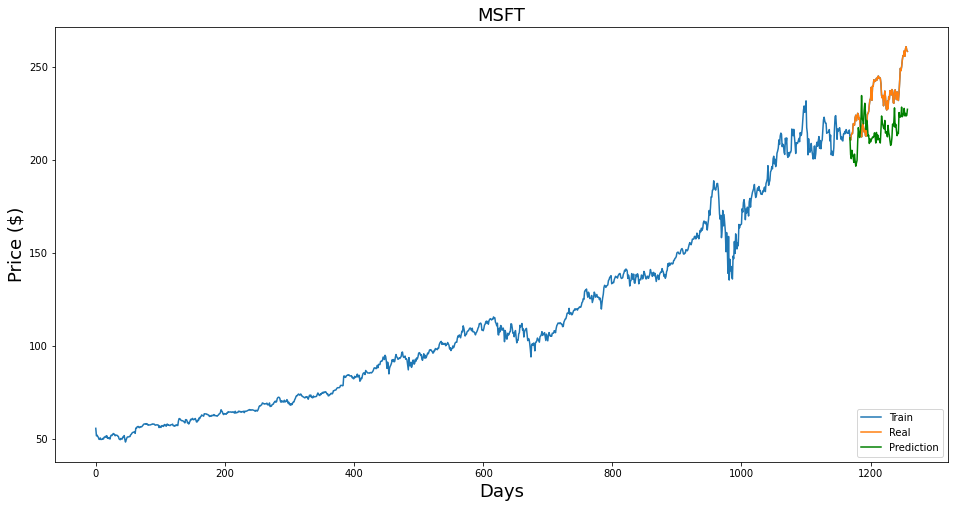

In [163]:
#Visualize the data
predictions = lr_prediction
#Plot the data
# final = np.array(df.drop(columns=['Prediction']))[:-2*predict_days]

# valid =  (df[x_train.shape[0]+predict_days:])[['Close']]
valid =  (df[-predict_days:])[['Close']]
# print(valid.shape[0])
# print(predictions.shape[0])
# print(valid)
valid['Prediction'] = predictions
first_vals = valid.iloc[0]
# print(first_vals)
valid = valid.sub([0, first_vals['Prediction']-first_vals['Close']], axis='columns')
# print(valid)
plt.figure(figsize=(16,8))
plt.title('MSFT', fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Prediction'], color="green")
plt.legend(['Train', 'Real', 'Prediction' ], loc='lower right')
plt.show()

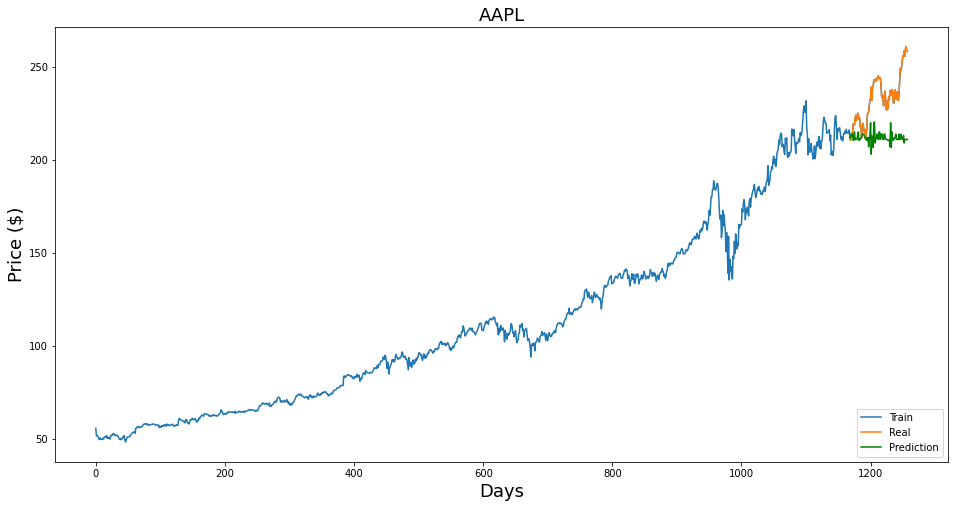

In [149]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  (df[-predict_days:])[['Close']]
# valid =  (df[x_train.shape[0]+predict_days:])[['Close']]
valid['Prediction'] = predictions
# print(valid)
first_vals = valid.iloc[0]
# print(first_vals)
valid = valid.sub([0, first_vals['Prediction']-first_vals['Close']], axis='columns')
# print(valid)
plt.figure(figsize=(16,8))
plt.title('AAPL', fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Prediction'], color="green")
plt.legend(['Train', 'Real', 'Prediction' ], loc='lower right')
plt.show()